In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
### Create the Bidirectional LSTM model
from random import random
from numpy import array
from numpy import cumsum
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [2]:
df=pd.read_csv('train-2 copy.csv',parse_dates=True)
df.head()

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [4]:
df.shape

(1017209, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df2=df.reindex(index=df.index[::-1])

In [7]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017208,1115,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1


In [8]:
df2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
4,5,5,2015-07-31,4822,559,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
0,1,5,2015-07-31,5263,555,1,1,0,1


In [9]:
atr2=df2[df2.Store==682]

In [10]:
atr2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1015661,682,3,2013-01-02,10526,1742,1,0,0,1
1014546,682,4,2013-01-03,11041,1839,1,0,0,1
1013431,682,5,2013-01-04,11376,1855,1,0,0,1
1012316,682,6,2013-01-05,7593,1304,1,0,0,0


In [11]:
atr2.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5141,682,1,2015-07-27,14722,1990,1,1,0,1
4026,682,2,2015-07-28,13595,1876,1,1,0,1
2911,682,3,2015-07-29,12320,1828,1,1,0,1
1796,682,4,2015-07-30,13026,1837,1,1,0,1
681,682,5,2015-07-31,13979,2013,1,1,0,1


In [12]:
atr2.shape

(942, 9)

In [13]:
atr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 1016776 to 681
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          942 non-null    int64 
 1   DayOfWeek      942 non-null    int64 
 2   Date           942 non-null    object
 3   Sales          942 non-null    int64 
 4   Customers      942 non-null    int64 
 5   Open           942 non-null    int64 
 6   Promo          942 non-null    int64 
 7   StateHoliday   942 non-null    object
 8   SchoolHoliday  942 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 73.6+ KB


In [14]:
atr2.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,942.0,942.000000,942.000000,942.000000,942.0,942.000000,942.000000
mean,682.0,3.997877,11207.408705,1758.842887,1.0,0.382166,0.183652
std,0.0,1.998404,3253.524235,362.326000,0.0,0.486175,0.387406
min,682.0,1.000000,3375.000000,566.000000,1.0,0.000000,0.000000
25%,682.0,2.000000,8252.000000,1425.750000,1.0,0.000000,0.000000
50%,682.0,4.000000,11113.500000,1834.500000,1.0,0.000000,0.000000
75%,682.0,6.000000,13646.000000,2024.000000,1.0,1.000000,0.000000
max,682.0,7.000000,22052.000000,2816.000000,1.0,1.000000,1.000000


In [15]:
atr2.Sales.value_counts()

11447    3
11231    3
10754    2
11410    2
7742     2
        ..
14287    1
13732    1
7927     1
8490     1
13979    1
Name: Sales, Length: 903, dtype: int64

In [16]:
atr2=atr2.set_index('Date')

In [17]:
atr2.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,682,2,3375,566,1,0,a,1
2013-01-02,682,3,10526,1742,1,0,0,1
2013-01-03,682,4,11041,1839,1,0,0,1
2013-01-04,682,5,11376,1855,1,0,0,1
2013-01-05,682,6,7593,1304,1,0,0,0


In [18]:
atr2=atr2.drop(columns=['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'])

In [19]:
atr2.head()

,Sales
Date,
2013-01-01,3375
2013-01-02,10526
2013-01-03,11041
2013-01-04,11376
2013-01-05,7593


In [20]:
atr2.tail()

,Sales
Date,
2015-07-27,14722
2015-07-28,13595
2015-07-29,12320
2015-07-30,13026
2015-07-31,13979


<AxesSubplot:xlabel='Date'>

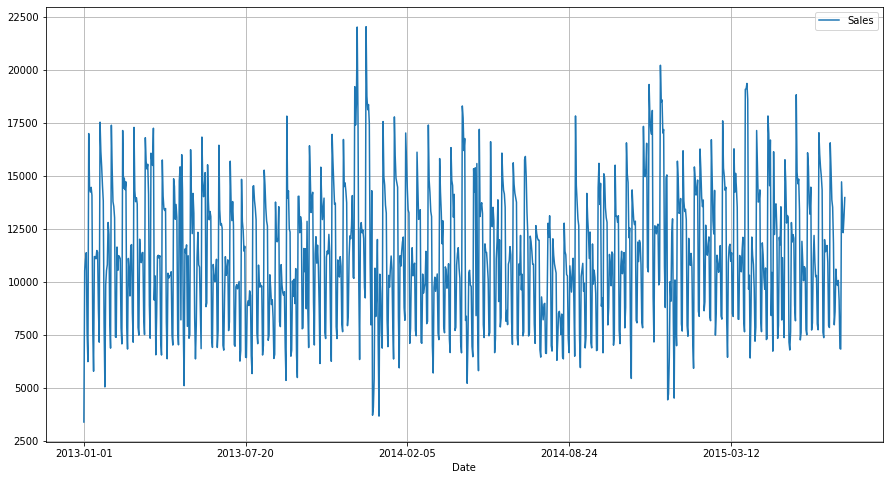

In [21]:
atr2.plot(figsize=(15,8), grid=True)

In [22]:
df1=atr2.reset_index()['Sales']

In [23]:
df1.shape

(942,)

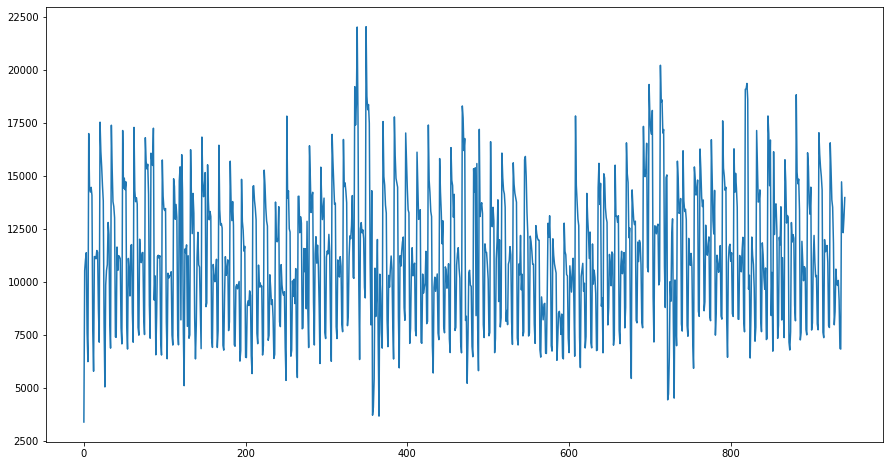

In [24]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(df1)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0.5,1)) ## Scaling range is btw 0-1.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.5       ],
       [0.69143867],
       [0.70522568],
       [0.71419393],
       [0.61291963],
       [0.57637736],
       [0.86483375],
       [0.79731756],
       [0.79086577],
       [0.79680891],
       [0.78666274],
       [0.61532901],
       [0.56425015],
       [0.70924131],
       [0.70918777],
       [0.70643037],
       [0.71692456],
       [0.71478289],
       [0.64255501],
       [0.60100659],
       [0.87923649],
       [0.84218558],
       [0.82288376],
       [0.79921829],
       [0.77967554],
       [0.6234406 ],
       [0.54438614],
       [0.67339508],
       [0.69189377],
       [0.69901483],
       [0.752396  ],
       [0.73697596],
       [0.62788456],
       [0.59348396],
       [0.87538149],
       [0.82004605],
       [0.77873856],
       [0.7727151 ],
       [0.75831236],
       [0.60767254],
       [0.60705681],
       [0.72134176],
       [0.69184023],
       [0.71041923],
       [0.7089736 ],
       [0.70653745],
       [0.61907694],
       [0.598

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(612, 330)

In [29]:
print(train_data)
print('\n')
print(atr2.iloc[0:612]) #train

[[0.5       ]
 [0.69143867]
 [0.70522568]
 [0.71419393]
 [0.61291963]
 [0.57637736]
 [0.86483375]
 [0.79731756]
 [0.79086577]
 [0.79680891]
 [0.78666274]
 [0.61532901]
 [0.56425015]
 [0.70924131]
 [0.70918777]
 [0.70643037]
 [0.71692456]
 [0.71478289]
 [0.64255501]
 [0.60100659]
 [0.87923649]
 [0.84218558]
 [0.82288376]
 [0.79921829]
 [0.77967554]
 [0.6234406 ]
 [0.54438614]
 [0.67339508]
 [0.69189377]
 [0.69901483]
 [0.752396  ]
 [0.73697596]
 [0.62788456]
 [0.59348396]
 [0.87538149]
 [0.82004605]
 [0.77873856]
 [0.7727151 ]
 [0.75831236]
 [0.60767254]
 [0.60705681]
 [0.72134176]
 [0.69184023]
 [0.71041923]
 [0.7089736 ]
 [0.70653745]
 [0.61907694]
 [0.5987846 ]
 [0.86868876]
 [0.7958987 ]
 [0.80850779]
 [0.79389088]
 [0.80376934]
 [0.62156663]
 [0.59230604]
 [0.70691225]
 [0.69143867]
 [0.65942068]
 [0.72302832]
 [0.72442041]
 [0.6382449 ]
 [0.60095304]
 [0.87262408]
 [0.7924988 ]
 [0.77868501]
 [0.78369117]
 [0.77549928]
 [0.6196659 ]
 [0.60986775]
 [0.73124699]
 [0.71012475]
 [0.70

In [30]:
print(test_data)
print('\n')
print(atr2.iloc[612:])  #test

[[0.74846067]
 [0.6072442 ]
 [0.56888151]
 [0.68413021]
 [0.69213471]
 [0.7007014 ]
 [0.66525673]
 [0.67556353]
 [0.59369813]
 [0.6080741 ]
 [0.7891792 ]
 [0.75879424]
 [0.73922471]
 [0.70688547]
 [0.74029555]
 [0.600257  ]
 [0.59377844]
 [0.72519677]
 [0.67443915]
 [0.6920544 ]
 [0.68316646]
 [0.66260641]
 [0.59037854]
 [0.59128875]
 [0.79640735]
 [0.82719387]
 [0.7752048 ]
 [0.80184184]
 [0.64646356]
 [0.65679713]
 [0.58751405]
 [0.81396905]
 [0.80861487]
 [0.77100177]
 [0.75841945]
 [0.7526637 ]
 [0.62277132]
 [0.64432189]
 [0.71197194]
 [0.69901483]
 [0.67235102]
 [0.71510414]
 [0.71240028]
 [0.59720512]
 [0.60938588]
 [0.82486481]
 [0.76072174]
 [0.76026664]
 [0.75252985]
 [0.76088237]
 [0.61578412]
 [0.59913262]
 [0.69719441]
 [0.71593404]
 [0.68758366]
 [0.69861327]
 [0.71432778]
 [0.61905017]
 [0.64501794]
 [0.85308133]
 [0.81420999]
 [0.80301976]
 [0.73312095]
 [0.74532848]
 [0.60285378]
 [0.55512127]
 [0.79356963]
 [0.77284896]
 [0.75512663]
 [0.74971891]
 [0.75405579]
 [0.62

In [31]:
len(train_data), len(test_data)

(612, 330)

In [32]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [34]:
print(X_train)

[[0.5        0.69143867 0.70522568 ... 0.83142368 0.78569899 0.76960968]
 [0.69143867 0.70522568 0.71419393 ... 0.78569899 0.76960968 0.76752155]
 [0.70522568 0.71419393 0.61291963 ... 0.76960968 0.76752155 0.77006479]
 ...
 [0.58772822 0.60563795 0.70645714 ... 0.70712641 0.65163035 0.58325748]
 [0.60563795 0.70645714 0.72843604 ... 0.65163035 0.58325748 0.88710714]
 [0.70645714 0.72843604 0.78104085 ... 0.58325748 0.88710714 0.79951277]]


In [35]:
print(y_train)

[0.76752155 0.77006479 0.6266531  0.5800182  0.68822616 0.68201531
 0.68471917 0.68554907 0.69007335 0.60986775 0.59733897 0.80765112
 0.79817422 0.75646517 0.77517803 0.75863361 0.6169085  0.59766022
 0.80505434 0.82274991 0.62919634 0.83816994 0.79140119 0.6152487
 0.5459924  0.71882529 0.71331049 0.72404562 0.62097767 0.71031215
 0.60593243 0.61013546 0.84440756 0.78575253 0.73828773 0.78915243
 0.76409488 0.63307812 0.57983081 0.62207528 0.70819725 0.7399743
 0.69877389 0.6960968  0.64726669 0.59281469 0.86041656 0.80556299
 0.78500294 0.79605932 0.81549499 0.64590138 0.65055951 0.82534668
 0.77927397 0.7557959  0.76631686 0.75986507 0.6059592  0.5943674
 0.69930931 0.68439792 0.67746426 0.68795845 0.70584141 0.59431386
 0.61535579 0.85008299 0.76888687 0.74904963 0.75103068 0.74540879
 0.59696418 0.59091396 0.66043797 0.709161   0.6855223  0.69197409
 0.7051186  0.61565027 0.62670664 0.82989774 0.78002356 0.7547786
 0.77881887 0.74846067 0.59757991 0.59581303 0.67085185 0.67374311

In [36]:
print(X_train.shape), print(y_train.shape)

(511, 100)
(511,)


(None, None)

In [37]:
print(X_test.shape), print(ytest.shape)

(229, 100)
(229,)


(None, None)

In [38]:
X_train =X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [39]:
X_train.shape

(511, 1, 100)

In [40]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model=Sequential()
model.add(Bidirectional(SimpleRNN(units=32, input_shape=(1,100), activation="relu")))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [42]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

2022-03-24 23:27:55.272857: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-24 23:27:55.274877: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 4s 7ms/sample - loss: 0.0477 - mape: 25.7877 - val_loss: 0.0410 - val_mape: 25.9016
Epoch 2/150
511/511 [==============================] - 0s 186us/sample - loss: 0.0239 - mape: 18.5134 - val_loss: 0.0212 - val_mape: 15.8215
Epoch 3/150
511/511 [==============================] - 0s 186us/sample - loss: 0.0157 - mape: 14.4955 - val_loss: 0.0110 - val_mape: 12.5287
Epoch 4/150
511/511 [==============================] - 0s 182us/sample - loss: 0.0101 - mape: 11.3199 - val_loss: 0.0094 - val_mape: 10.5949
Epoch 5/150
511/511 [==============================] - 0s 181us/sample - loss: 0.0088 - mape: 11.0576 - val_loss: 0.0086 - val_mape: 10.3308
Epoch 6/150
511/511 [==============================] - 0s 183us/sample - loss: 0.0081 - mape: 10.0573 - val_loss: 0.0082 - val_mape: 10.3505
Epoch 7/150
511/511 [==============================] - 0s 180us/sample - loss: 0.0078 - mape: 10.2759 - val_lo

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  8512      
_________________________________________________________________
dense (Dense)                multiple                  520       
_________________________________________________________________
dense_1 (Dense)              multiple                  9         
Total params: 9,041
Trainable params: 9,041
Non-trainable params: 0
_________________________________________________________________


In [44]:
modela=Sequential()
modela.add(Bidirectional(SimpleRNN(units=64, input_shape=(1,100), activation="relu")))
modela.add(Dense(16, activation='relu'))
modela.add(Dense(1))
modela.compile(loss='mse',  optimizer='adam',metrics = ['mape'])

In [45]:
modela.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 3s 6ms/sample - loss: 0.0556 - mape: 27.8206 - val_loss: 0.0334 - val_mape: 20.8694
Epoch 2/150
511/511 [==============================] - 0s 210us/sample - loss: 0.0202 - mape: 16.3867 - val_loss: 0.0225 - val_mape: 18.6616
Epoch 3/150
511/511 [==============================] - 0s 206us/sample - loss: 0.0126 - mape: 12.9391 - val_loss: 0.0141 - val_mape: 12.5400
Epoch 4/150
511/511 [==============================] - 0s 202us/sample - loss: 0.0092 - mape: 11.2246 - val_loss: 0.0096 - val_mape: 11.6251
Epoch 5/150
511/511 [==============================] - 0s 203us/sample - loss: 0.0083 - mape: 10.1219 - val_loss: 0.0080 - val_mape: 10.2568
Epoch 6/150
511/511 [==============================] - 0s 202us/sample - loss: 0.0079 - mape: 10.5133 - val_loss: 0.0096 - val_mape: 10.5193
Epoch 7/150
511/511 [==============================] - 0s 202us/sample - loss: 0.0077 - mape: 9.7148 - val_los

In [46]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection multiple                  21120     
_________________________________________________________________
dense_2 (Dense)              multiple                  2064      
_________________________________________________________________
dense_3 (Dense)              multiple                  17        
Total params: 23,201
Trainable params: 23,201
Non-trainable params: 0
_________________________________________________________________


In [47]:
import tensorflow as tf
from tensorflow import keras

In [48]:
!pip install -q -U keras-tuner

In [49]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

/Users/saismailzain/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  after removing the cwd from sys.path.


In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(hp.Int('Bidirectional_RNN_i_input_unit',min_value=16,max_value=160,step=16),return_sequences=True,input_shape=(1,100))))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(Bidirectional(SimpleRNN(hp.Int(f'rnn_{i}_units',min_value=16,max_value=160,step=16),return_sequences=True)))
    model.add(Bidirectional(SimpleRNN(hp.Int('layer_2_neurons',min_value=16,max_value=160,step=16)))) 
    model.add(Dense(hp.Int(f'dense_{i}_units',min_value=16,max_value=256,step=16),activation="relu"))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mape'])
    return model
                                             

In [51]:
tuner= RandomSearch(
        build_model,
        objective='mape',
        max_trials=5,
        executions_per_trial=3,
        directory='prostud',
        project_name='Rossmann forecasting'
        )

In [52]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
Bidirectional_RNN_i_input_unit (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
n_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
rnn_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
layer_2_neurons (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 160, 'step': 16, 'sampling': None}
dense_0_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
Dropout_rate (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [53]:
tuner.search(
        x=X_train,
        y=y_train,
        epochs=100,
        batch_size=128,
        validation_data=(X_test,ytest),
)

Trial 5 Complete [00h 01m 42s]
mape: 13.32437801361084

Best mape So Far: 13.177687644958496
Total elapsed time: 00h 08m 40s
INFO:tensorflow:Oracle triggered exit


In [54]:
tuner.results_summary()

Results summary
Results in prostud/Rossmann forecasting
Showing 10 best trials
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 80
n_layers: 2
rnn_0_units: 48
layer_2_neurons: 96
dense_0_units: 240
Dropout_rate: 0.1
learning_rate: 0.0001
rnn_1_units: 16
dense_1_units: 16
Score: 13.177687644958496
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 64
n_layers: 2
rnn_0_units: 96
layer_2_neurons: 112
dense_0_units: 32
Dropout_rate: 0.5
learning_rate: 0.0001
rnn_1_units: 80
dense_1_units: 160
rnn_2_units: 144
dense_2_units: 256
Score: 13.32437801361084
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 144
n_layers: 2
rnn_0_units: 128
layer_2_neurons: 128
dense_0_units: 128
Dropout_rate: 0.4
learning_rate: 0.01
rnn_1_units: 32
dense_1_units: 176
rnn_2_units: 32
dense_2_units: 16
Score: 14.604670524597168
Trial summary
Hyperparameters:
Bidirectional_RNN_i_input_unit: 128
n_layers: 2
rnn_0_units: 112
layer_2_neurons: 112
dense_0_units: 160
Dropout_rate: 

In [56]:
from tensorflow.keras import optimizers

In [57]:
modelcc1=Sequential()
modelcc1.add(Bidirectional(SimpleRNN(80, return_sequences=True, input_shape=(1,100))))
modelcc1.add(Bidirectional(SimpleRNN(48, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
modelcc1.add(Bidirectional(SimpleRNN(96)))
modelcc1.add(Dense(240, activation='relu'))
modelcc1.add(Dropout(0.1))
modelcc1.add(Dense(16, activation='relu'))
modelcc1.add(Dense(1))
sgd=optimizers.SGD(lr=0.0001)
modelcc1.compile(loss='mse',optimizer='adam', metrics=['mape'])

In [58]:
modelcc1.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=150,batch_size=64,verbose=1)

Train on 511 samples, validate on 229 samples
Epoch 1/150
511/511 [==============================] - 15s 29ms/sample - loss: 0.1680 - mape: 44.6006 - val_loss: 0.0381 - val_mape: 26.2636
Epoch 2/150
511/511 [==============================] - 0s 559us/sample - loss: 0.0302 - mape: 19.9510 - val_loss: 0.0130 - val_mape: 14.2099
Epoch 3/150
511/511 [==============================] - 0s 570us/sample - loss: 0.0166 - mape: 14.8558 - val_loss: 0.0085 - val_mape: 10.1449
Epoch 4/150
511/511 [==============================] - 0s 575us/sample - loss: 0.0135 - mape: 13.4734 - val_loss: 0.0085 - val_mape: 10.2219
Epoch 5/150
511/511 [==============================] - 0s 575us/sample - loss: 0.0099 - mape: 11.2026 - val_loss: 0.0072 - val_mape: 9.6481
Epoch 6/150
511/511 [==============================] - 0s 569us/sample - loss: 0.0105 - mape: 12.0125 - val_loss: 0.0068 - val_mape: 9.2600
Epoch 7/150
511/511 [==============================] - 0s 566us/sample - loss: 0.0097 - mape: 11.3168 - val_lo

In [59]:
modelcc1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection multiple                  28960     
_________________________________________________________________
bidirectional_5 (Bidirection multiple                  20064     
_________________________________________________________________
bidirectional_6 (Bidirection multiple                  3616      
_________________________________________________________________
bidirectional_7 (Bidirection multiple                  24768     
_________________________________________________________________
dense_2 (Dense)              multiple                  46320     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                 

In [60]:
#Lets Do the prediction and check performance metrics
train_predict=modela.predict(X_train)
test_predict=modela.predict(X_test)

In [61]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [62]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11488.97231419777

In [63]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

12178.683795121033

In [64]:
print(test_predict)

[[10282.562 ]
 [15709.298 ]
 [17099.367 ]
 [16165.556 ]
 [16249.155 ]
 [15638.681 ]
 [ 9522.603 ]
 [ 8400.544 ]
 [13041.9375]
 [12859.021 ]
 [13352.212 ]
 [10468.958 ]
 [10253.754 ]
 [ 6490.1816]
 [ 8807.463 ]
 [16215.854 ]
 [14726.173 ]
 [14764.005 ]
 [13415.439 ]
 [12583.48  ]
 [ 7669.8423]
 [ 6821.7236]
 [13230.916 ]
 [11915.183 ]
 [11448.866 ]
 [12005.907 ]
 [11963.526 ]
 [ 8193.96  ]
 [ 7333.632 ]
 [13110.633 ]
 [13358.359 ]
 [13339.602 ]
 [13561.402 ]
 [11720.206 ]
 [ 7835.3735]
 [ 8787.192 ]
 [15333.973 ]
 [14130.718 ]
 [12389.757 ]
 [12483.59  ]
 [11643.439 ]
 [ 6918.457 ]
 [ 7078.8296]
 [14880.861 ]
 [14939.15  ]
 [12907.506 ]
 [12960.658 ]
 [15206.787 ]
 [10693.269 ]
 [ 8489.914 ]
 [13837.917 ]
 [14078.193 ]
 [13194.199 ]
 [12903.364 ]
 [14394.272 ]
 [12236.683 ]
 [ 9690.347 ]
 [16069.677 ]
 [13274.386 ]
 [11497.604 ]
 [11610.385 ]
 [13367.443 ]
 [ 8790.657 ]
 [ 8779.827 ]
 [14656.107 ]
 [15561.569 ]
 [13083.448 ]
 [12951.193 ]
 [13186.62  ]
 [11049.353 ]
 [ 8610.716 ]
 [1299

In [65]:
len(train_predict)

511

In [66]:
len(test_predict)

229

In [67]:
test_data.shape

(330, 1)

In [68]:
test_predict.shape

(229, 1)

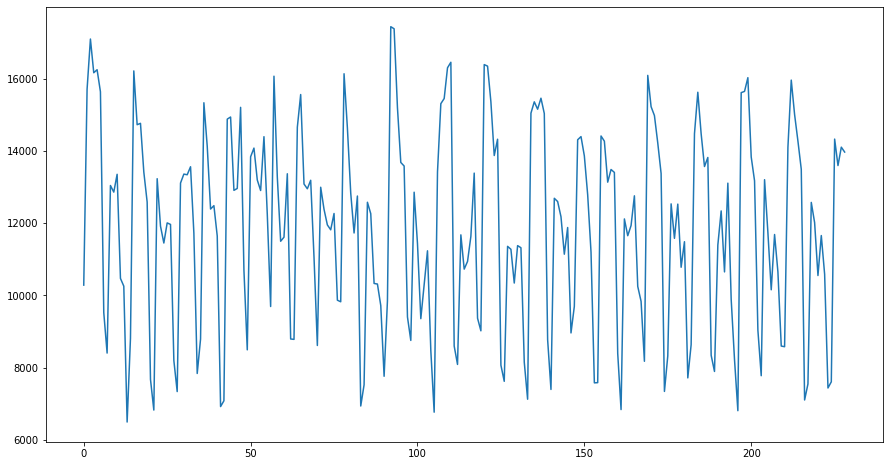

In [69]:
plt.plot(test_predict)

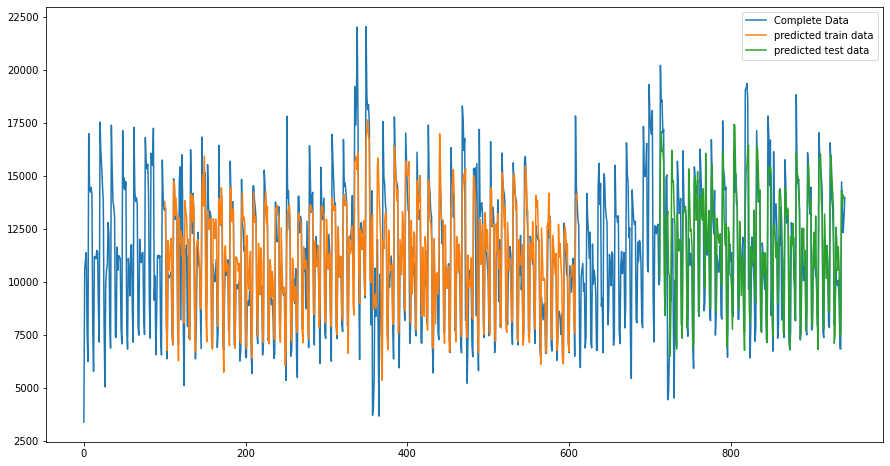

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='Complete Data')
plt.plot(trainPredictPlot, label='predicted train data')
plt.plot(testPredictPlot, label='predicted test data')
plt.legend()
plt.show()

In [71]:
len(test_data)


330

In [72]:
x_input=test_data[230:].reshape(1,-1)
x_input.shape

(1, 100)

In [73]:
temp_input=list(x_input) # converting to a list
temp_input=temp_input[0].tolist() # storing the values here

In [74]:
temp_input #All my test_data is present here (previous 100 days data)

[0.6679605932430261,
 0.6948385715050597,
 0.604299405686138,
 0.6057450339990362,
 0.8871071371205226,
 0.8644321893237672,
 0.7989238100337313,
 0.8566686298656101,
 0.6346843711516839,
 0.6891899127268833,
 0.5896289553996894,
 0.8418375542110617,
 0.7371098142099909,
 0.7753118809230605,
 0.775900840606093,
 0.742999411040317,
 0.6058253466830862,
 0.6223162178079992,
 0.7335760561117952,
 0.7240723884992237,
 0.7722332280344809,
 0.6290624832681908,
 0.7079563098998769,
 0.6393692777212614,
 0.6067623279970017,
 0.8317181560207743,
 0.8040370509182417,
 0.7516464100230229,
 0.7612303903196445,
 0.7593296567971302,
 0.6010601274294587,
 0.5910745837125877,
 0.6143384911923757,
 0.7522889114954221,
 0.7276329174921026,
 0.7370295015259409,
 0.7325319912191466,
 0.6475076297049848,
 0.6280451892702255,
 0.9139583444878728,
 0.8161642662097768,
 0.801306419660545,
 0.8072495582802377,
 0.7685656154628688,
 0.6038443004765219,
 0.6132676554050436,
 0.7285431279113348,
 0.70335171601434

In [75]:
len(temp_input)

100

In [76]:
# demonstrate prediction for next 80 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<80):
    
    if(len(temp_input)>100): # Now if there are greater than 100 elements, start from the 1st index element
        
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1,1,n_steps))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1,1, n_steps)) # All the previous 100 days data will be passed here
        yhat = model.predict(x_input, verbose=0) # it will be predicted here
        print(yhat[0]) # I obtain my yhat value
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) # Now I'm adding my yhat value inside my final o/p i.e lst_output
        i=i+1                            # Now I'm also adding my yhat value in my previous i/p i.e temp_input
                                         # Now temp_input will have 101 elements.
    

print(lst_output)

[0.6135888]
101
1 day input [0.69483857 0.60429941 0.60574503 0.88710714 0.86443219 0.79892381
 0.85666863 0.63468437 0.68918991 0.58962896 0.84183755 0.73710981
 0.77531188 0.77590084 0.74299941 0.60582535 0.62231622 0.73357606
 0.72407239 0.77223323 0.62906248 0.70795631 0.63936928 0.60676233
 0.83171816 0.80403705 0.75164641 0.76123039 0.75932966 0.60106013
 0.59107458 0.61433849 0.75228891 0.72763292 0.7370295  0.73253199
 0.64750763 0.62804519 0.91395834 0.81616427 0.80130642 0.80724956
 0.76856562 0.6038443  0.61326766 0.72854313 0.70335172 0.67874926
 0.69649837 0.69430315 0.6169085  0.61024254 0.84055255 0.8231247
 0.77681105 0.76289019 0.79704985 0.61631954 0.62534133 0.70426193
 0.73598544 0.70209348 0.68380896 0.68536167 0.62402956 0.61661402
 0.86587782 0.83854473 0.82202709 0.81059592 0.79340901 0.61350859
 0.60670879 0.73071157 0.71534508 0.7171655  0.7233228  0.70206671
 0.62183434 0.61953204 0.8531081  0.82012636 0.78085346 0.77175135
 0.7262676  0.62295872 0.63961022 0

In [77]:
lst_output

[[0.613588809967041],
 [0.6135736703872681],
 [0.7371243238449097],
 [0.732714056968689],
 [0.6789330840110779],
 [0.7394991517066956],
 [0.6608346104621887],
 [0.6049484014511108],
 [0.5920876264572144],
 [0.7671717405319214],
 [0.7667047381401062],
 [0.7615031599998474],
 [0.7549328804016113],
 [0.7325297594070435],
 [0.6258934140205383],
 [0.6097233891487122],
 [0.7853395938873291],
 [0.7192192077636719],
 [0.7315665483474731],
 [0.7042592763900757],
 [0.7041320204734802],
 [0.582770586013794],
 [0.6115781664848328],
 [0.749279797077179],
 [0.7747687697410583],
 [0.7268398404121399],
 [0.7307204008102417],
 [0.7427732348442078],
 [0.5964804291725159],
 [0.6264804601669312],
 [0.7492312788963318],
 [0.7577212452888489],
 [0.7011975049972534],
 [0.7397096753120422],
 [0.6853052377700806],
 [0.609930157661438],
 [0.5820668339729309],
 [0.7646462321281433],
 [0.7410640716552734],
 [0.7221168875694275],
 [0.739285409450531],
 [0.7183536887168884],
 [0.6038126945495605],
 [0.6059858798980

In [78]:
len(lst_output)

80

In [79]:
fnl_output=scaler.inverse_transform(lst_output)

In [80]:
fnl_output

array([[ 7617.99640751],
       [ 7617.43088365],
       [12232.5419929 ],
       [12067.80088401],
       [10058.86642015],
       [12321.25131285],
       [ 9382.8160392 ],
       [ 7295.2425878 ],
       [ 6814.84119868],
       [13354.93319583],
       [13337.48878849],
       [13143.18903863],
       [12897.76281452],
       [12060.91663289],
       [ 8077.62258732],
       [ 7473.60747826],
       [14033.57519007],
       [11563.7142868 ],
       [12024.93684697],
       [11004.90101027],
       [11000.14749277],
       [ 6466.81246996],
       [ 7542.89083087],
       [12686.59754002],
       [13638.71262491],
       [11848.37539876],
       [11993.32985187],
       [12443.55141437],
       [ 6978.92995131],
       [ 8099.55110908],
       [12684.78519189],
       [13001.91939652],
       [10890.53160167],
       [12329.11521161],
       [10296.89185166],
       [ 7481.33110929],
       [ 6440.52451622],
       [13260.59535491],
       [12379.70733261],
       [11671.95421827],


In [81]:
len(fnl_output)

80

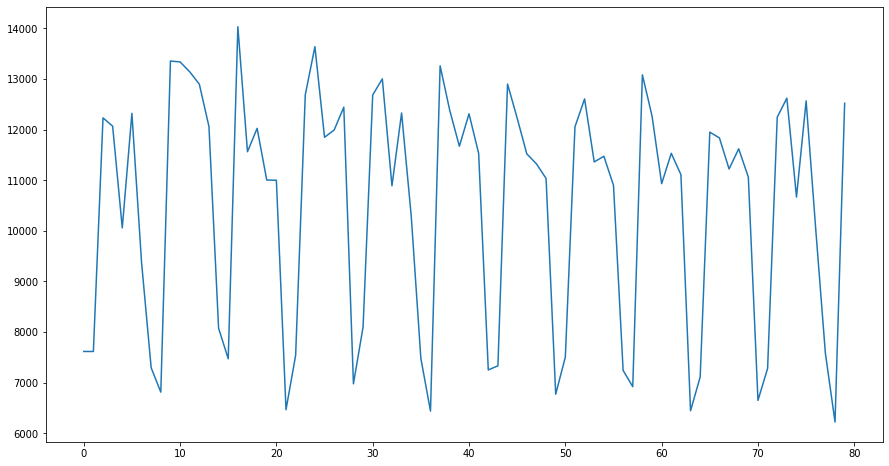

In [82]:
plt.plot(fnl_output)

In [83]:
import matplotlib.pyplot as plt

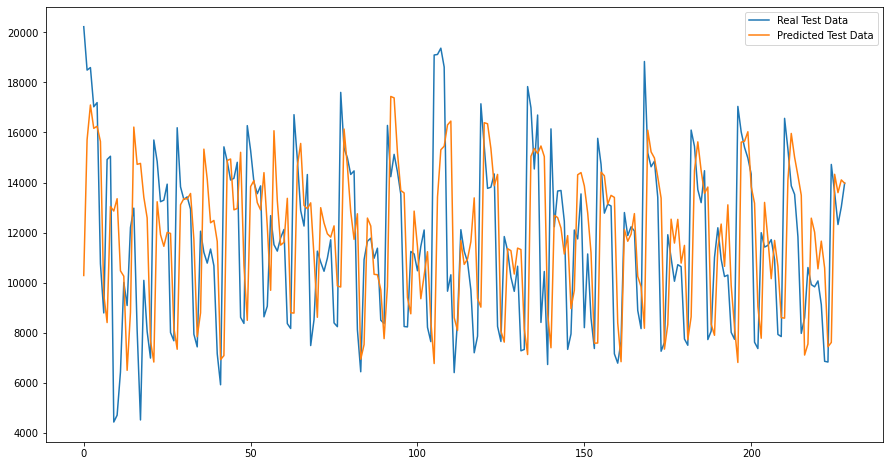

In [84]:
plt.plot(scaler.inverse_transform(df1[713:]),label='Real Test Data')
plt.plot(test_predict, label='Predicted Test Data')
plt.legend()
plt.show()

In [85]:
date = pd.date_range(start='2015/08/01', periods=80, freq='D')
date

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01',
               '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05',
               '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09',
               '2015-09-10', '2015-09-11', '2015-09-12', '2015-09-13',
               '2015-09-14', '2015-09-15', '2015-09-16', '2015-09-17',
               '2015-09-18', '2015-09-19', '2015-09-20', '2015-09-21',
               '2015-09-22', '2015-09-23', '2015-09-24', '2015-09-25',
      

In [86]:
ff=pd.DataFrame(fnl_output, columns=['Forecast'])

In [87]:
ff

,Forecast
0,7617.996408
1,7617.430884
2,12232.541993
3,12067.800884
4,10058.866420
...,...
75,12567.672770
76,10026.731751
77,7580.854403
78,6223.839818


In [88]:
ff['Time_Stamp'] = pd.DataFrame(date)

In [89]:
ff

,Forecast,Time_Stamp
0,7617.996408,2015-08-01
1,7617.430884,2015-08-02
2,12232.541993,2015-08-03
3,12067.800884,2015-08-04
4,10058.866420,2015-08-05
...,...,...
75,12567.672770,2015-10-15
76,10026.731751,2015-10-16
77,7580.854403,2015-10-17
78,6223.839818,2015-10-18


In [90]:
ff=ff.set_index('Time_Stamp')

In [91]:
ff

,Forecast
Time_Stamp,
2015-08-01,7617.996408
2015-08-02,7617.430884
2015-08-03,12232.541993
2015-08-04,12067.800884
2015-08-05,10058.866420
...,...
2015-10-15,12567.672770
2015-10-16,10026.731751
2015-10-17,7580.854403


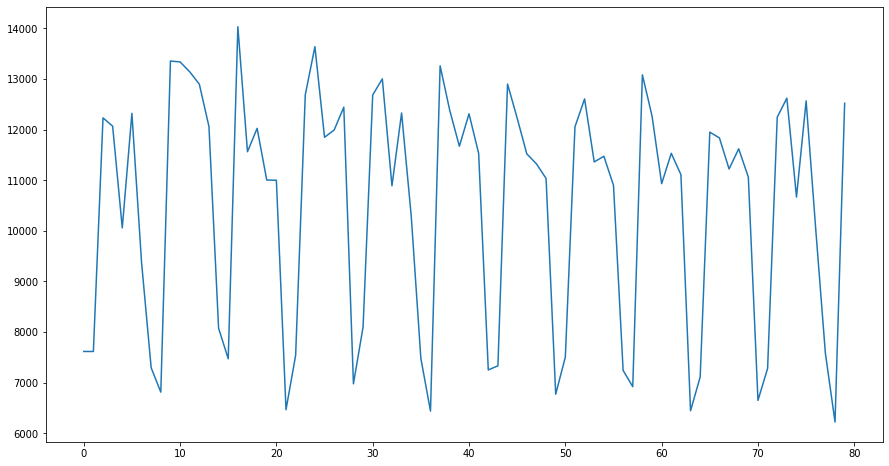

In [92]:
plt.plot(fnl_output)

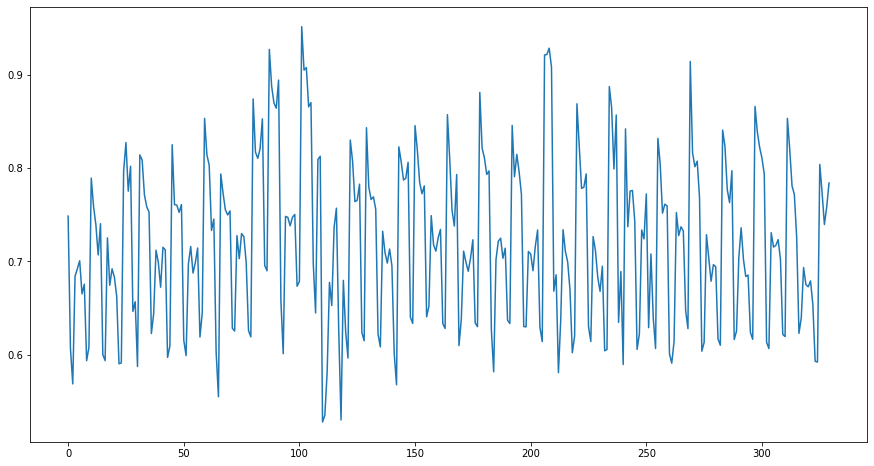

In [93]:
plt.plot(test_data)

In [94]:
day_new1=np.arange(1,331)
day_pred1=np.arange(331,411)

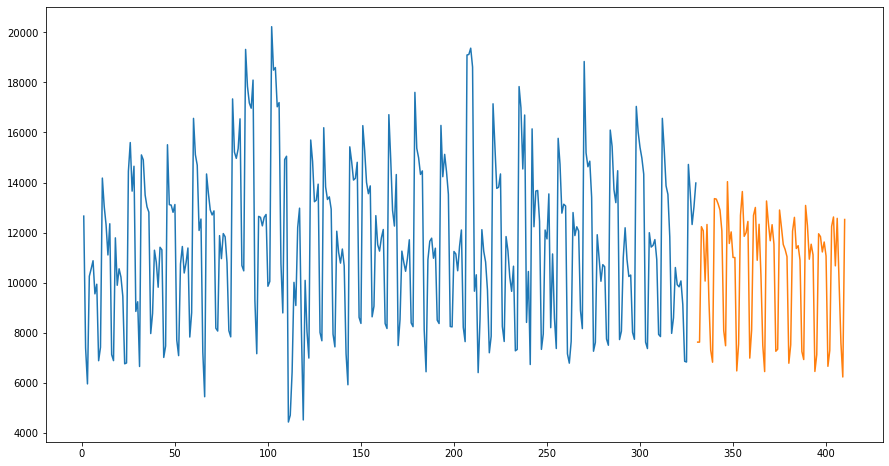

In [95]:
plt.plot(day_new1,scaler.inverse_transform(df1[612:]))
plt.plot(day_pred1,fnl_output)

In [96]:
daynew2=np.arange(1,230)
day3fore=np.arange(230,310)

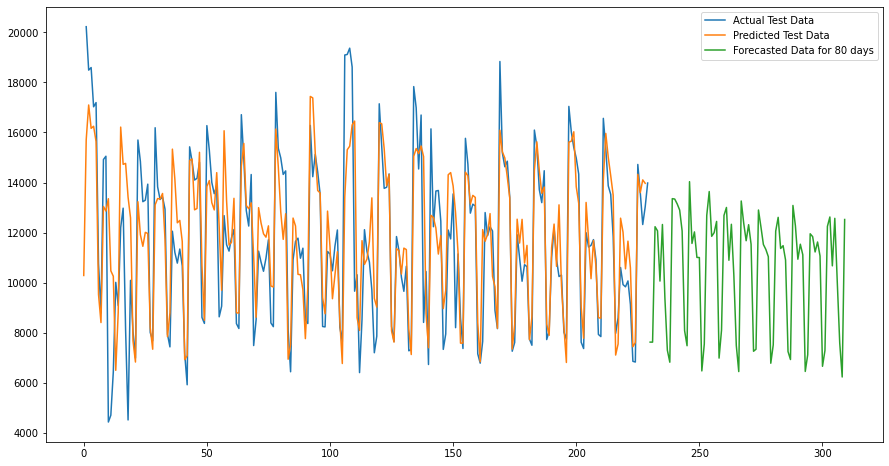

In [97]:
plt.plot(daynew2,scaler.inverse_transform(df1[713:]), label='Actual Test Data')
plt.plot(test_predict,label='Predicted Test Data')
plt.plot(day3fore,fnl_output, label='Forecasted Data for 80 days')
plt.legend()
plt.show()

In [98]:
vv=atr2.iloc[212:292]
vv.head()

,Sales
Date,
2013-08-01,13479
2013-08-02,12925
2013-08-03,7569
2013-08-04,7075
2013-08-05,10789


In [99]:
vv.tail()

,Sales
Date,
2013-10-15,12130
2013-10-16,10883
2013-10-17,11730
2013-10-18,10715
2013-10-19,8836


In [100]:
len(vv)

80

In [101]:
jj=atr2.iloc[577:657]

In [102]:
jj.head()

,Sales
Date,
2014-08-01,11718
2014-08-02,6985
2014-08-03,6726
2014-08-04,12031
2014-08-05,11256


In [103]:
jj.tail()

,Sales
Date,
2014-10-15,9813
2014-10-16,11410
2014-10-17,11309
2014-10-18,7006
2014-10-19,7461


In [104]:
len(jj)

80

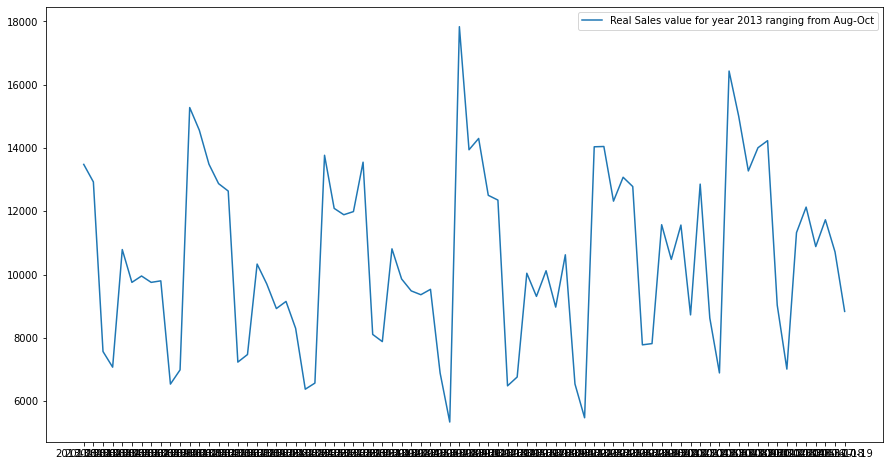

In [105]:
plt.plot(vv['Sales'], label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

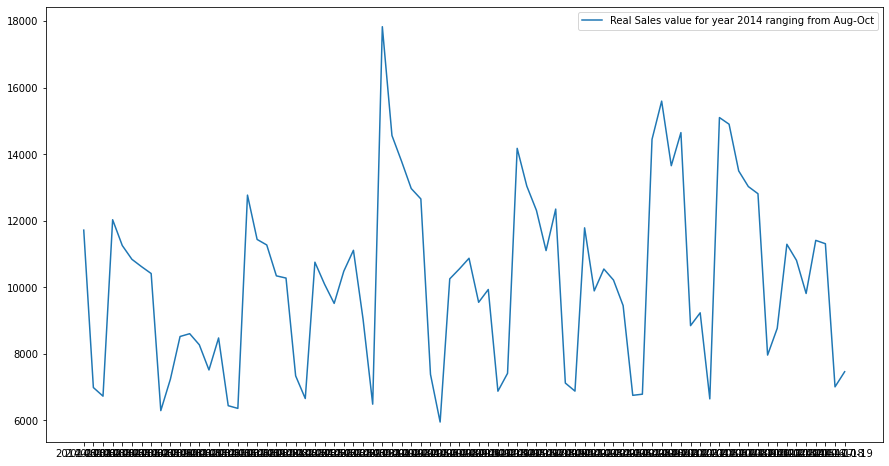

In [106]:
plt.plot(jj['Sales'],label='Real Sales value for year 2014 ranging from Aug-Oct')
plt.legend()
plt.show()

In [107]:
a1=vv.reset_index()['Sales']

In [108]:
a1

0     13479
1     12925
2      7569
3      7075
4     10789
      ...  
75    12130
76    10883
77    11730
78    10715
79     8836
Name: Sales, Length: 80, dtype: int64

In [109]:
len(a1)

80

In [110]:
b1=jj.reset_index()['Sales']

In [111]:
b1

0     11718
1      6985
2      6726
3     12031
4     11256
      ...  
75     9813
76    11410
77    11309
78     7006
79     7461
Name: Sales, Length: 80, dtype: int64

In [112]:
len(b1)

80

In [113]:
len(train_predict)

511

In [114]:
atr2.iloc[101:612]

,Sales
Date,
2013-04-12,13463
2013-04-13,8106
2013-04-14,6364
2013-04-15,10406
2013-04-16,10174
...,...
2014-08-31,6485
2014-09-01,17835
2014-09-02,14563


In [115]:
date1 = pd.date_range(start='2013/04/12', periods=511, freq='D')
date1

DatetimeIndex(['2013-04-12', '2013-04-13', '2013-04-14', '2013-04-15',
               '2013-04-16', '2013-04-17', '2013-04-18', '2013-04-19',
               '2013-04-20', '2013-04-21',
               ...
               '2014-08-26', '2014-08-27', '2014-08-28', '2014-08-29',
               '2014-08-30', '2014-08-31', '2014-09-01', '2014-09-02',
               '2014-09-03', '2014-09-04'],
              dtype='datetime64[ns]', length=511, freq='D')

In [116]:
njc=pd.DataFrame(train_predict, columns=['Predicted Train Data'])

In [117]:
njc

,Predicted Train Data
0,13782.125977
1,13412.729492
2,8389.068359
3,6762.416992
4,11947.021484
...,...
506,8082.460938
507,7568.871582
508,12040.470703
509,14143.125977


In [118]:
njc['time_Stamp'] = pd.DataFrame(date1)

In [119]:
njc

,Predicted Train Data,time_Stamp
0,13782.125977,2013-04-12
1,13412.729492,2013-04-13
2,8389.068359,2013-04-14
3,6762.416992,2013-04-15
4,11947.021484,2013-04-16
...,...,...
506,8082.460938,2014-08-31
507,7568.871582,2014-09-01
508,12040.470703,2014-09-02
509,14143.125977,2014-09-03


In [120]:
njc=njc.set_index('time_Stamp')

In [121]:
njc

,Predicted Train Data
time_Stamp,
2013-04-12,13782.125977
2013-04-13,13412.729492
2013-04-14,8389.068359
2013-04-15,6762.416992
2013-04-16,11947.021484
...,...
2014-08-31,8082.460938
2014-09-01,7568.871582
2014-09-02,12040.470703


In [122]:
njc.iloc[111:191]

,Predicted Train Data
time_Stamp,
2013-08-01,12802.411133
2013-08-02,13093.800781
2013-08-03,12675.513672
2013-08-04,8459.667969
2013-08-05,7414.750977
...,...
2013-10-15,11937.417969
2013-10-16,11042.572266
2013-10-17,10704.299805


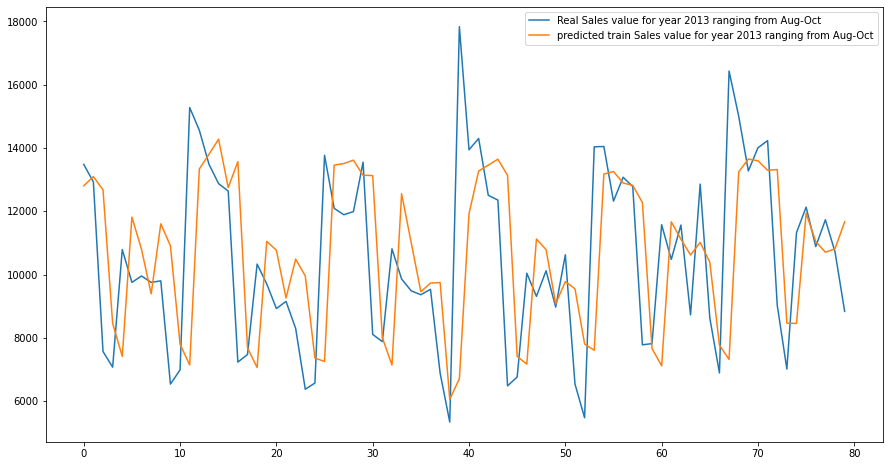

In [123]:
plt.plot(a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.legend()
plt.show()

In [124]:
daynewa=np.arange(1,81)
day3foreb=np.arange(81,161)

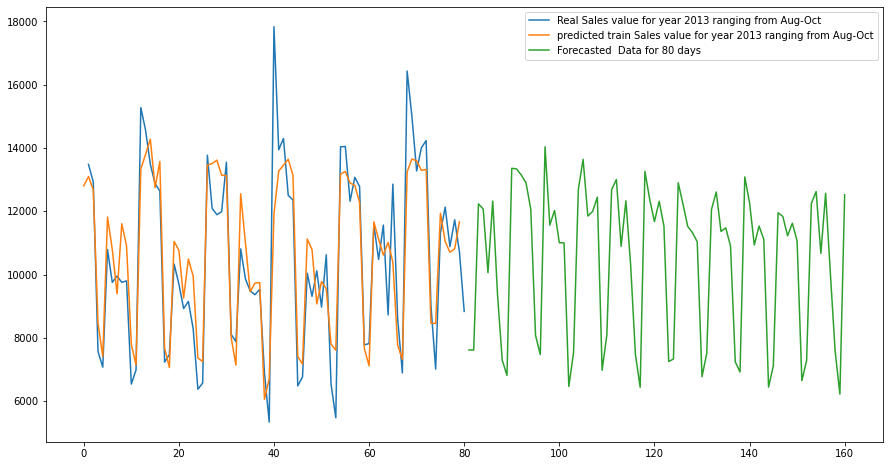

In [125]:
plt.plot(daynewa,a1,label='Real Sales value for year 2013 ranging from Aug-Oct')
plt.plot(train_predict[111:191], label='predicted train Sales value for year 2013 ranging from Aug-Oct')
plt.plot(day3foreb,fnl_output, label='Forecasted  Data for 80 days')
plt.legend()
plt.show()

In [126]:
nn=atr2.iloc[577:612]
nn.head()

,Sales
Date,
2014-08-01,11718
2014-08-02,6985
2014-08-03,6726
2014-08-04,12031
2014-08-05,11256


In [127]:
nn.tail()

,Sales
Date,
2014-08-31,6485
2014-09-01,17835
2014-09-02,14563
2014-09-03,13786
2014-09-04,12969


In [128]:
len(nn)

35

In [129]:
c1=nn.reset_index()['Sales']

In [130]:
c1

0     11718
1      6985
2      6726
3     12031
4     11256
5     10841
6     10620
7     10413
8      6291
9      7241
10     8520
11     8604
12     8270
13     7514
14     8476
15     6439
16     6358
17    12771
18    11438
19    11272
20    10343
21    10277
22     7337
23     6655
24    10754
25    10093
26     9515
27    10483
28    11112
29     9039
30     6485
31    17835
32    14563
33    13786
34    12969
Name: Sales, dtype: int64

In [131]:
len(c1)

35

In [132]:
njc.iloc[476:511]

,Predicted Train Data
time_Stamp,
2014-08-01,12125.521484
2014-08-02,12904.686523
2014-08-03,7542.811035
2014-08-04,7270.882812
2014-08-05,12205.425781
2014-08-06,11585.872070
2014-08-07,10886.245117
2014-08-08,10377.876953
2014-08-09,11333.476562


In [133]:
aar1=np.arange(1,36)
aar2=np.arange(36,71)

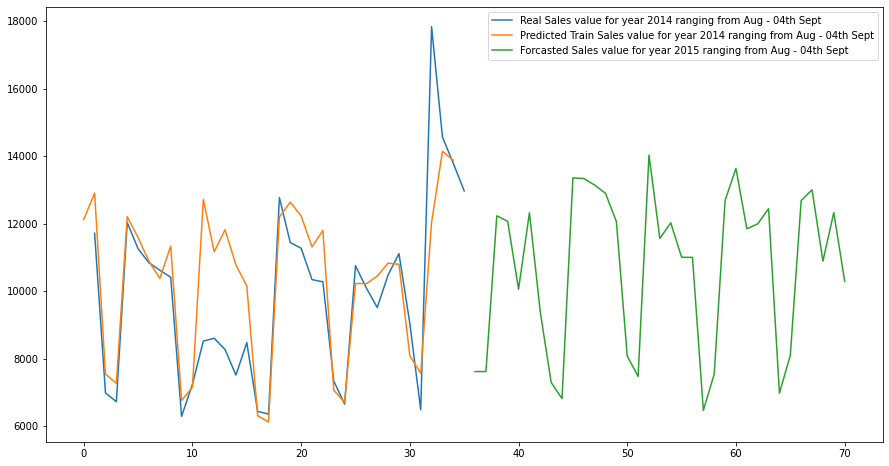

In [134]:
plt.plot(aar1,c1,label='Real Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(train_predict[476:511], label='Predicted Train Sales value for year 2014 ranging from Aug - 04th Sept')
plt.plot(aar2,fnl_output[0:35], label='Forcasted Sales value for year 2015 ranging from Aug - 04th Sept')
plt.legend()
plt.show()

In [135]:
import jovian

In [136]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/ismailzain1697/bidirectional-rnn-store-682


'https://jovian.ai/ismailzain1697/bidirectional-rnn-store-682'